In [65]:
import csv
import math
import matplotlib.pyplot as plt
from collections import defaultdict

In [23]:
# This will suppress any warnings, comment out if you'd like to preserve them
import warnings
warnings.filterwarnings("ignore")

In [43]:
def readCSV(path,dataset):
  with open(path,newline='\n') as f:
      reader = csv.DictReader(f)
      for row in reader:
          dataset.append(row)
          
      

In [44]:
raw_recipe_path = '/Users/keli/Desktop/CSE258/assin2/RAW_recipes.csv'
recipe_data = []
readCSV(raw_recipe_path,recipe_data)

In [45]:
len(recipe_data)

231637

In [46]:
recipe_data[0]

{'name': 'arriba   baked winter squash mexican style',
 'id': '137739',
 'minutes': '55',
 'contributor_id': '47892',
 'submitted': '2005-09-16',
 'tags': "['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']",
 'nutrition': '[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]',
 'n_steps': '11',
 'steps': "['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce th

In [120]:
nutritionPerid = defaultdict(list)
recipePerid = defaultdict(list)
for d in recipe_data:
    id,nutrition,name,tags = d['id'],d['nutrition'][1:-1],d['name'],d['tags']
    nutritionPerid[id] = [v.strip() for v in nutrition.split(',')]
    recipePerid[id] = [name,tags]

#### Nutrition Variable
- [calories(#),total fat(PDV),sugar(PDV),sodium(PDV),protein(PDV),saturated fat(PDV),carbohydrates(PDV)]
#### Healthy recipe
- [< 800, N/A, < 10, < 7, N/A, < 10, N/A]


In [70]:
maxCalories, maxSugar, maxSFat, maxSodium = 0,0,0,0
for id in nutritionPerid:
    maxCalories = max(float(nutritionPerid[id][0]),maxCalories)
    maxSugar = max(float(nutritionPerid[id][2]),maxSugar)
    maxSodium = max(float(nutritionPerid[id][3]),maxSodium)
    maxSFat = max(float(nutritionPerid[id][5]),maxSFat)
        

In [71]:
maxCalories, maxSugar, maxSFat, maxSodium

(434360.2, 362729.0, 10395.0, 29338.0)

In [131]:
calories= ['<=200', '<=400', '<=600', '<=800', '<=1000', '>1000']
num_recipe_calories = [0,0,0,0,0,0] 
for id in nutritionPerid:
    cal = float(nutritionPerid[id][0])
    if 0 < cal <= 200:
        num_recipe_calories[0] += 1
    elif 200 < cal <= 400:
        num_recipe_calories[1] += 1
    elif 400 < cal <= 600:
        num_recipe_calories[2] += 1
    elif 600 < cal <= 800:
        num_recipe_calories[3] += 1
    elif 800 < cal <= 1000:
        num_recipe_calories[4] += 1
    else:
        num_recipe_calories[5] += 1

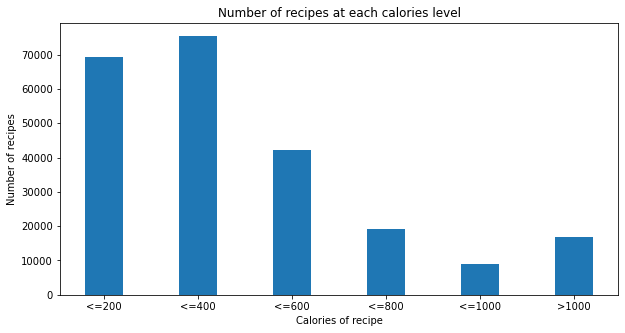

In [132]:
fig = plt.figure(figsize=(10,5))
plt.bar(calories,num_recipe_calories,width=0.4)
plt.xlabel("Calories of recipe")
plt.ylabel("Number of recipes")
plt.title("Number of recipes at each calories level")
plt.show()

In [96]:
sugars= ['<=10', '<=20', '<=30', '<=40', '<=50', '>50']
num_recipe_sugar = [0,0,0,0,0,0] 
for id in nutritionPerid:
    sug = float(nutritionPerid[id][2])
    if 0 < sug <= 10:
        num_recipe_sugar[0] += 1
    elif 10 < sug <= 20:
        num_recipe_sugar[1] += 1
    elif 20 < sug <= 30:
        num_recipe_sugar[2] += 1
    elif 30 < sug <= 40:
        num_recipe_sugar[3] += 1
    elif 40 < sug <= 50:
        num_recipe_sugar[4] += 1
    else:
        num_recipe_sugar[5] += 1

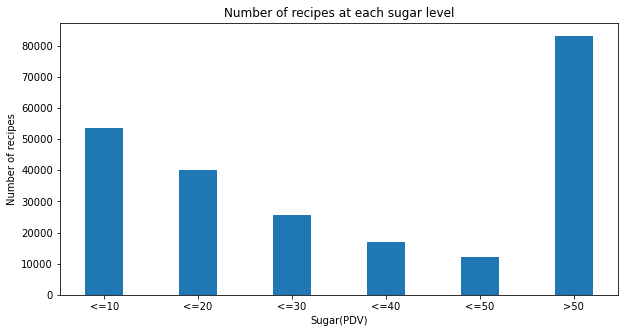

In [97]:
fig = plt.figure(figsize=(10,5))
plt.bar(sugars,num_recipe_sugar,width=0.4)
plt.xlabel("Sugar(PDV)")
plt.ylabel("Number of recipes")
plt.title("Number of recipes at each sugar level")
plt.show()

In [98]:
sodiums = ['<=7', '<=14', '<=28', '<=35', '<=42', '>42']
num_recipe_sodiums = [0,0,0,0,0,0] 
for id in nutritionPerid:
    sod = float(nutritionPerid[id][3])
    if 0 < sod <= 7:
        num_recipe_sodiums[0] += 1
    elif 7 < sod <= 14:
        num_recipe_sodiums[1] += 1
    elif 14 < sod <= 28:
        num_recipe_sodiums[2] += 1
    elif 28 < sod <= 35:
        num_recipe_sodiums[3] += 1
    elif 35 < sod <= 42:
        num_recipe_sodiums[4] += 1
    else:
        num_recipe_sodiums[5] += 1

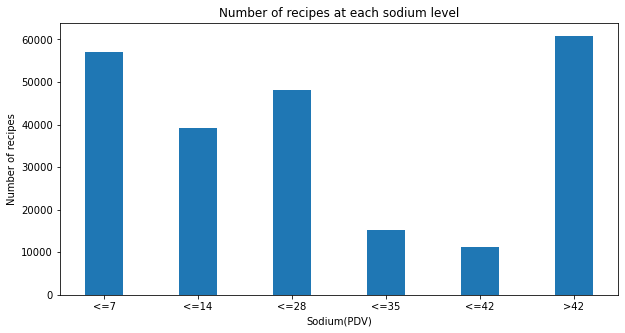

In [99]:
fig = plt.figure(figsize=(10,5))
plt.bar(sodiums,num_recipe_sodiums,width=0.4)
plt.xlabel("Sodium(PDV)")
plt.ylabel("Number of recipes")
plt.title("Number of recipes at each sodium level")
plt.show()

In [100]:
satFat = ['<=10', '<=20', '<=30', '<=40', '<=50', '>50']
num_recipe_satFat = [0,0,0,0,0,0] 
for id in nutritionPerid:
    satF = float(nutritionPerid[id][5])
    if 0 < satF <= 10:
        num_recipe_satFat[0] += 1
    elif 10 < satF <= 20:
        num_recipe_satFat[1] += 1
    elif 20 < satF <= 30:
        num_recipe_satFat[2] += 1
    elif 30 < satF <= 40:
        num_recipe_satFat[3] += 1
    elif 40 < satF <= 50:
        num_recipe_satFat[4] += 1
    else:
        num_recipe_satFat[5] += 1

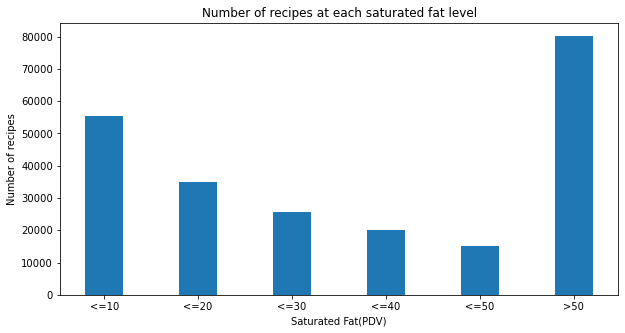

In [101]:
fig = plt.figure(figsize=(10,5))
plt.bar(satFat,num_recipe_satFat,width=0.4)
plt.xlabel("Saturated Fat(PDV)")
plt.ylabel("Number of recipes")
plt.title("Number of recipes at each saturated fat level")
plt.show()

In [123]:
typesRecipe = ['healthy','unhealthy']
num_recipe_heath = [0,0]
healthy_recipes = []
for id in nutritionPerid:
    cal, sugar, sod, satF = float(nutritionPerid[id][0]), float(nutritionPerid[id][2]), float(nutritionPerid[id][3]), float(nutritionPerid[id][5])
    if cal < 700 and sugar < 10 and sod < 10 and satF < 10:
        num_recipe_heath[0] += 1
        healthy_recipes.append(recipePerid[id])
    else:
        num_recipe_heath[1] += 1


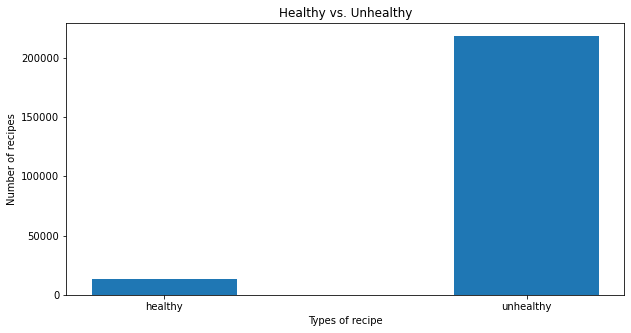

In [124]:
fig = plt.figure(figsize=(10,5))
plt.bar(typesRecipe,num_recipe_heath,width=0.4)
plt.xlabel("Types of recipe")
plt.ylabel("Number of recipes")
plt.title("Healthy vs. Unhealthy")
plt.show()

In [133]:
healthy_recipes[0]

['calm your nerves  tonic',
 "['15-minutes-or-less', 'time-to-make', 'preparation', 'easy', 'number-of-servings']"]

In [116]:
num_recipe_heath[0]/sum(num_recipe_heath)

0.05755557186459849